# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/itay/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


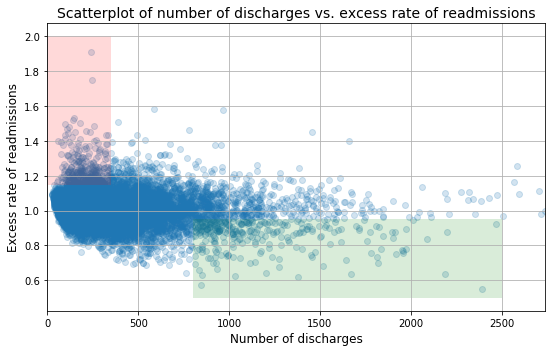

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

*A.* Lets start by looking at the joint ditribution

In [5]:
import seaborn as sns

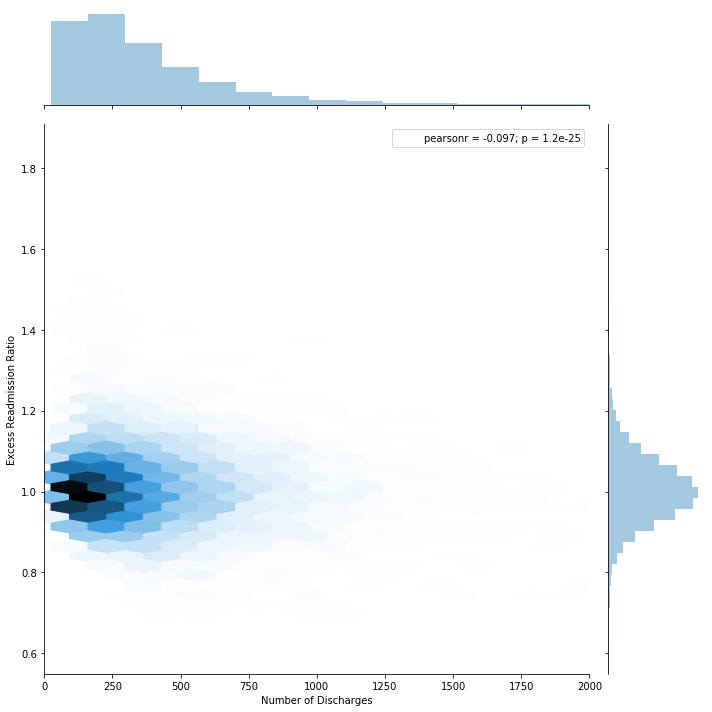

In [6]:

g = sns.jointplot('Number of Discharges', 
                  'Excess Readmission Ratio', data=clean_hospital_read_df, kind="hex",
                 xlim=(0,2000), size=10)

While there is a negative correlation, it is weak. Most of the data seems uncorrelated, with some outliers for places with smaller number of discharges.

Lets have a look at the dataset: 

In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


I'm not really sure why 100 and 1000 were chosen as cutoff points for the statistics, it seems kind of random. Just for comparison I kept the convention and added a med size category

In [8]:
small_capacity = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 100]
large_capacity = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000]
med_capacity = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 100) & 
                                      (clean_hospital_read_df['Number of Discharges'] < 1000)]

In [9]:
small_capacity.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,1304.000000,1304.000000,81.0,1223.000000,1223.000000,1223.000000,1223.000000
mean,253996.913344,70.754601,7.0,1.022088,20.010057,19.619133,16.019624
std,160685.301786,24.676969,0.0,0.058154,3.026628,2.871217,4.339663
min,10012.000000,0.000000,7.0,0.893500,7.200000,5.300000,11.000000
25%,110059.000000,59.000000,7.0,0.983800,18.000000,17.950000,13.000000
50%,240069.000000,76.000000,7.0,1.016700,20.000000,19.800000,15.000000
75%,390068.500000,89.000000,7.0,1.052750,22.000000,21.500000,18.000000
max,670082.000000,100.000000,7.0,1.495300,30.000000,28.000000,34.000000


In [10]:
large_capacity.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,464.000000,464.000000,0.0,464.000000,464.000000,464.000000,464.000000
mean,251395.012931,1382.601293,NaN,0.978334,16.037284,16.082543,215.829741
std,136052.556952,458.958967,NaN,0.119878,8.150099,7.721789,128.757558
min,10039.000000,1000.000000,NaN,0.549500,2.700000,4.100000,23.000000
25%,140118.500000,1107.000000,NaN,0.908050,5.500000,5.300000,86.750000
50%,230130.000000,1241.500000,NaN,0.986000,19.200000,19.500000,228.500000
75%,340121.500000,1510.000000,NaN,1.057100,22.625000,22.500000,288.750000
max,520138.000000,6793.000000,NaN,1.454300,31.000000,25.700000,879.000000


It seems that both the mean and the median are different. 

Let’s try a t-test to check if this is statistically significant

In [11]:
from scipy import stats

In [12]:
_, p_val = stats.ttest_ind(small_capacity['Excess Readmission Ratio'].dropna(), 
                               large_capacity['Excess Readmission Ratio'].dropna()
                                              , axis=0, equal_var=False)
print('The readmission rates means for small and large size hospitals are different with p-value of {:1.2e}'.format(p_val))

The readmission rates means for small and large size hospitals are different with p-value of 2.06e-13


In [13]:
diff = np.mean(small_capacity['Excess Readmission Ratio']) - np.mean(large_capacity['Excess Readmission Ratio'])
print('The mean difference is: {:1.2e}'.format(diff))

The mean difference is: 4.38e-02


In [14]:
_, p_val = stats.ttest_ind(small_capacity['Excess Readmission Ratio'].dropna(), 
                               med_capacity['Excess Readmission Ratio'].dropna()
                                              , axis=0, equal_var=False)
print('The readmission rates means for small and medium size hospitals are different with p-value of {:1.2e}'.format(p_val))
diff = np.mean(small_capacity['Excess Readmission Ratio']) - np.mean(med_capacity['Excess Readmission Ratio'])
print('The mean difference is: {:1.2e}'.format(diff))

The readmission rates means for small and medium size hospitals are different with p-value of 6.25e-15
The mean difference is: 1.50e-02


In [15]:
_, p_val = stats.ttest_ind(med_capacity['Excess Readmission Ratio'].dropna(), 
                               large_capacity['Excess Readmission Ratio'].dropna()
                                              , axis=0, equal_var=False)
print('The readmission rates means for medium and large size hospitals are different with p-value of {:1.2e}'.format(p_val))
diff = np.mean(med_capacity['Excess Readmission Ratio']) - np.mean(large_capacity['Excess Readmission Ratio'])
print('The mean difference is: {:1.2e}'.format(diff))

The readmission rates means for medium and large size hospitals are different with p-value of 5.12e-07
The mean difference is: 2.87e-02


While the difference in means seems like it is statistically significant, with a very low $\alpha$ value, it is also a minute change, which in practice I'm not sure is telling us a lot. 
What we do notice is that there are outliers in the low capacity hospitals with very high readmission rate. This may not be entirely related to the size of the hospital, and maybe isolated to the hospitals themselves. As there are not many of them we can investigate a sample group and check what is the reason for high readmission. There can be many reasons like for examples the community in which the hospital is located at

A box and whisker plot will more informative then the original one, and if we insist on a scatter plot, the joint plot I presented is much more suitable. In the original scatter plot most of the data is in the center presented as a blob with unknown magnitude, thus it is hard to see how sparse the outliers are.

In [16]:
size = np.array([clean_hospital_read_df['Number of Discharges'] < 100], dtype=int);
size += [clean_hospital_read_df['Number of Discharges'] > 100];
size += [clean_hospital_read_df['Number of Discharges'] > 1000];
size_names = {0:'100 or less',
             1: 'between 100 and 1000',
             2: '1000 or more'}
size_category = [size_names[i] for i in size[0]]
clean_hospital_read_df['Excess Readmission Group'] = size_category

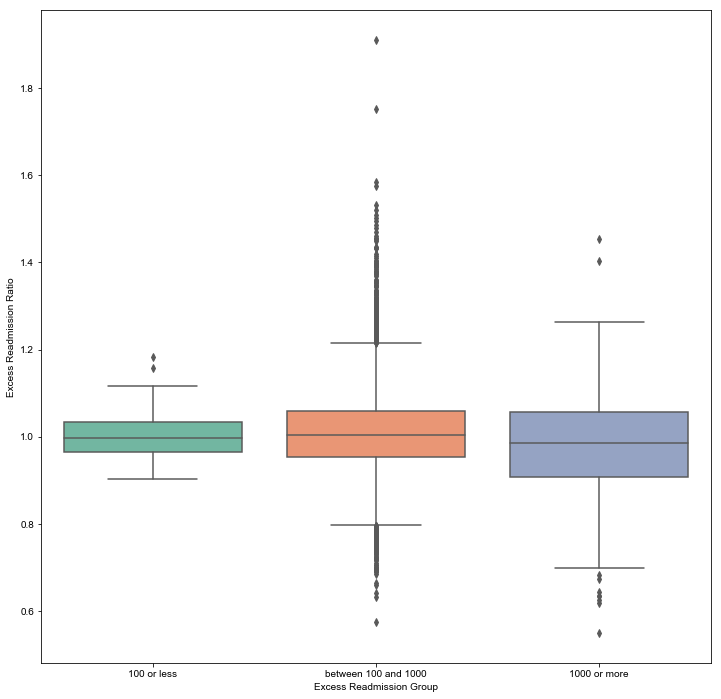

In [17]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set_style("whitegrid")
sns.boxplot(x='Excess Readmission Group', y='Excess Readmission Ratio', 
            data=clean_hospital_read_df, ax=ax,  palette='Set2',
           order=[size_names[0],size_names[1],size_names[2]])
plt.show()

This plot makes it much clearer that the three groups are mainly different by the outliers. It does show a slight decree in the median for larger facilities. Again, I would of selected a sample group from the outliers and check what they are doing good.

I'm not sure exactly why the number of discharges is *exactly* the hospital size (I tried to find a reference in the links but could not) 

Finally, grouping the excess readmissions by states can offer more insight

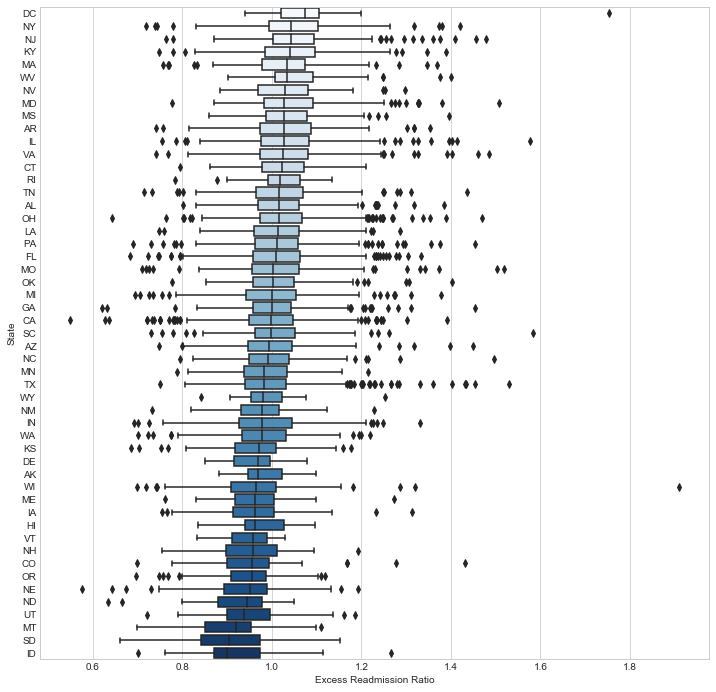

In [18]:
ranks = clean_hospital_read_df.groupby('State')['Excess Readmission Ratio'].median().sort_values()[::-1].index
fig, ax = plt.subplots(figsize=(12,12))
sns.set_style("whitegrid")
sns.boxplot(y='State', x='Excess Readmission Ratio', data=clean_hospital_read_df, ax=ax,  palette="Blues", 
            orient='h', order=ranks)
plt.show()

In [19]:
WV_excess_readmissions = clean_hospital_read_df[clean_hospital_read_df.State == 'WV']['Excess Readmission Ratio'].dropna().values
stats.ttest_1samp(WV_excess_readmissions, np.mean(clean_hospital_read_df['Excess Readmission Ratio']), axis=0)

Ttest_1sampResult(statistic=5.8325317732794462, pvalue=5.7684068119498426e-08)

We can see that the state may also have an effect on the mean excess readmission rate, for example it is higher in WV, and there seems to be only few outliers there. In any case the without more domain knowledge we cannot make recommendations, just report the statistics.  

They are also seeming to roughly divide into two groups, one with lower medians and less outliers and one with higher medians and more outliers